In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
union_find_df = pd.read_csv('union_find.csv')
union_find_df

,inputSize,pairCount
0,64,160.6
1,94,235.4
2,124,324.5
3,154,449.4
4,184,525.0
...,...,...
327,9874,50509.1
328,9904,46921.9
329,9934,48843.1
330,9964,52037.7


In [3]:
input_size_arr = union_find_df[['inputSize']].to_numpy().reshape((-1, 1))
pair_count_arr = union_find_df[['pairCount']].to_numpy().reshape((-1, 1))

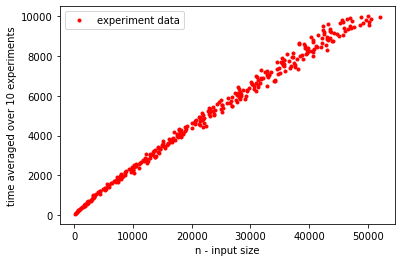

In [4]:
def scatter_plot(y = None):
    plt.plot(pair_count_arr, input_size_arr, "r.", label = "experiment data")
    if y is not None: plt.plot(y, input_size_arr, "b", label = "prediction")
    plt.xlabel('n - input size')
    plt.ylabel('time averaged over 10 experiments')
    plt.legend()
    plt.show()
scatter_plot()

In [5]:
# since this looks like linear relation, let me try lineat regression
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()

In [6]:
regr.fit(input_size_arr, pair_count_arr)
pair_count_pred = regr.predict(input_size_arr)
regr.coef_

array([[4.9730793]])

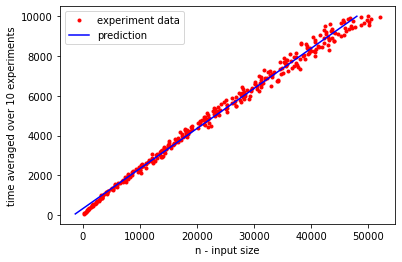

In [7]:
# plotting the predected line
scatter_plot(pair_count_pred)

The above line fits quite well for the **middle part** of the scatter plot,  
however notice the **begenning (n: 0 - 10k)** and the **ending (n: 40k - 50k)**,<br>
both the sections look to be falling away from the pridected line,  
this suggests that the plot is not exactly a straight line  
(number of pairs required to form 1 component is **not linearly proportional** to input size).

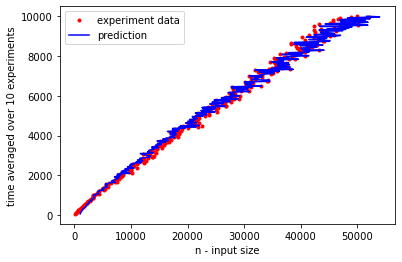

In [8]:
# lets try to fit it with a linearithmic plot (n lg n)
# pair_count_exp = np.copy(pair_count_arr)
# tuning intercept and coefficient manually to fit the curve with scatter plot
intercept = 950
coefficient = 0.065
pair_count_exp = coefficient * pair_count_arr * np.log2(pair_count_arr) + intercept
# plotting the predicted
scatter_plot(pair_count_exp)

After some manual coefficient and intercept tuning,  
this new plot seems to be a much better fit to the experiment data.  
Hence the relationship => **m = a * n * log2(n) + b**  
where -  
m: average number of pairs,  
n: input size  
and (a, b) are constants whose experimental value is (0.065, 950) respectively  